# Logistic Regression 

In [20]:
# Import necessary libraries for data manipulation, model training, and visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import import_ipynb  # Used for importing Jupyter notebooks as modules
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [21]:
# Import dataset preprocessing module
from preprocess import df  # Assuming 'preprocess.ipynb' contains preprocessing steps and loads the dataset into 'df'

# Display the first few rows of the dataframe to get an overview of the data
print(df.head())

    Startposisjon bredde  Startposisjon lengde  Havdybde start  Varighet  \
1                 74.885                16.048          -335.0     295.0   
5                 74.910                15.868          -403.0     267.0   
11                74.883                16.056          -346.0     315.0   
17                74.931                15.785          -443.0     243.0   
19                67.828                12.972           -71.0      63.0   

    Stopposisjon bredde  Stopposisjon lengde  Havdybde stopp  Trekkavstand  \
1                74.914               15.969          -334.0        3970.0   
5                74.901               16.248          -277.0       11096.0   
11               74.924               15.742          -496.0       10215.0   
17               74.926               15.894          -358.0        3214.0   
19               67.827               12.942           -56.0        1269.0   

    Redskap FDIR (kode)  Hovedart FAO Art - FDIR  Rundvekt  Bredde  \
1   

In [22]:
    # Selecting features and the target variable for the classification task
    features = [
        'Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
        'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
        'Redskap FDIR (kode)', 'Rundvekt', 'Month'
    ]
    X = df[features]  # Input features
    y = df['Hovedart FAO']  # Target variable for prediction

In [23]:


# Splitting the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)


# Creating and training the logistic regression model
# Balancing the class weights to account for class imbalance in the dataset
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test_scaled)

/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division= 1))

Accuracy: 0.5619939083277616
              precision    recall  f1-score   support

           0       0.71      0.40      0.51      5103
           1       0.71      0.59      0.65      3693
           2       0.66      0.86      0.75      2674
           3       0.21      0.42      0.28      1497
           4       0.41      0.86      0.56       494

    accuracy                           0.56     13461
   macro avg       0.54      0.63      0.55     13461
weighted avg       0.63      0.56      0.57     13461



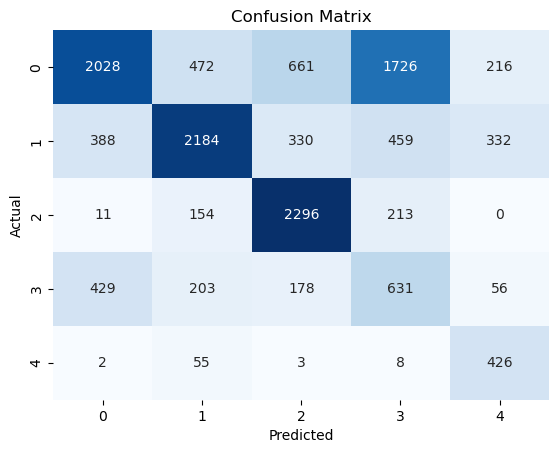

In [25]:
# Compute the confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for better interpretability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # 'cbar=False' disables the color bar
plt.xlabel('Predicted')  # the x-axis
plt.ylabel('Actual')  # the y-axis
plt.title('Confusion Matrix') 
plt.show()

Pipeline: Streamlines preprocessing and modeling steps, ensuring that transformations are applied consistently during both training and evaluation.
GridSearchCV: Automates the process of hyperparameter tuning and selects the best model configuration based on cross-validation performance. It also ensures your model is not just tuned to a specific subset of your data.
Normalization included in Pipeline: Ensures that feature scaling (standardization) is properly integrated into the model training process, avoiding data leakage and ensuring that the same scaling is applied to both training and test data.

/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best parameters found: {'model__C': 1, 'model__solver': 'liblinear'}
Accuracy on test set: 0.6456429685758859
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      5103
           1       0.70      0.63      0.66      3693
           2       0.66      0.86      0.75      2674
           3       1.00      0.00      0.00      1497
           4       0.46      0.76      0.57       494

    accuracy                           0.65     13461
   macro avg       0.69      0.59      0.53     13461
weighted avg       0.69      0.65      0.61     13461



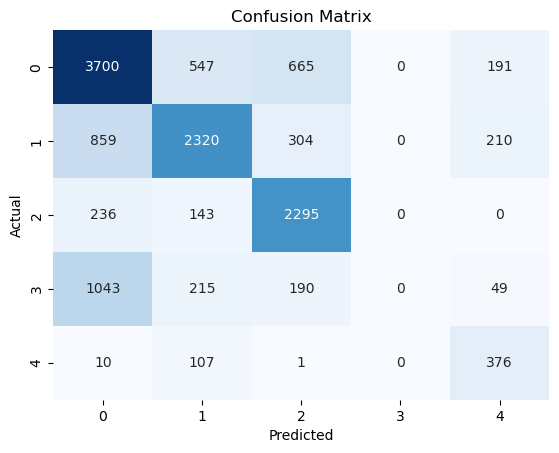

In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

# Define a grid of parameters to search
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']  
}

# Setup grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid.fit(X_train, y_train)

# Making predictions
y_pred = grid.predict(X_test)

# Evaluate the model
print("Best parameters found:", grid.best_params_)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division= 1))

# Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Splitting the data into training, validation, and testing sets to ensure that hyperparameter tuning does not overfit the test set.
Using the validation set (X_val_scaled, y_val) for model evaluation during the grid search. 
In GridSearchCV, the actual validation during hyperparameter tuning is done through cross-validation on the training set. The separate validation set here is conceptually useful for additional checks. 
Finally, evaluate the best model found by the grid search on the test set to get an unbiased estimate of the model's performance.


/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best parameters found: {'model__C': 1, 'model__solver': 'saga'}
Best validation accuracy: 0.6514039458622315
Precision: 0.6907427056594232
Recall: 0.6456429685758859
F1 Score: 0.6070494855902886
ROC-AUC: 0.8331269214860699
Weighted ROC-AUC: 0.8331269214860699
Accuracy on test set: 0.5615481762127628
              precision    recall  f1-score   support

           0       0.70      0.39      0.50      5103
           1       0.71      0.59      0.64      3693
           2       0.67      0.86      0.75      2674
           3       0.22      0.44      0.29      1497
           4       0.40      0.86      0.55       494

    accuracy                           0.56     13461
   macro avg       0.54      0.63      0.55     13461
weighted avg       0.63      0.56      0.57     13461



/Users/nino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


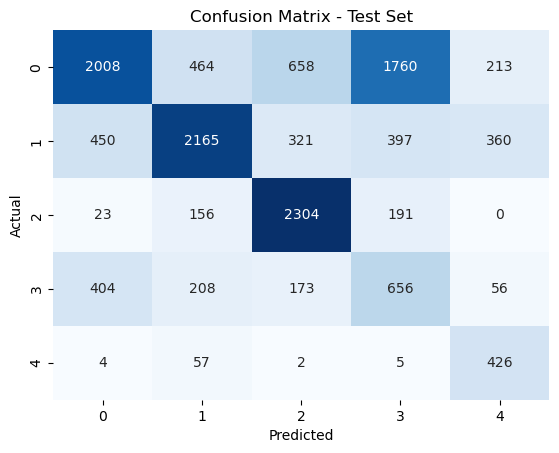

In [27]:
# First, split the data into a training set and a temporary set using an 80-20 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the temporary set into the actual validation and training sets using a 75-25 split
# This results in effectively 60% training, 20% validation, and 20% testing splits of the original dataset
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) 


sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


# Scale the features (it's important to fit the scaler only on the training data to prevent data leakage)
scaler = StandardScaler().fit(X_train_resampled)  # Fit on training data only
X_train_scaled = scaler.transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)  # Apply the same transformation to validation data
X_test_scaled = scaler.transform(X_test)  # And to test data

# Create the pipeline with a logistic regression model
logisticreg = LogisticRegression(max_iter=100)
pipeline = Pipeline([
    ('model', logisticreg)
])

# Define the grid of parameters to search
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'saga'],
    # Balance the class weights to account for class imbalance, as fish 0 is much more common than the other. and when the fish is to alike like the fish in the cod family, it will return 0 
}

# Setup grid search; note we're using the training set for fitting and the validation set for scoring
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search on the training set
grid.fit(X_train_scaled, y_train_resampled)
y_prob = grid.predict_proba(X_test)  # For ROC-AUC calculation, get the probability scores

# Weighted ROC-AUC 
classes = np.unique(y)
y_test_binarized = label_binarize(y_test, classes=classes)

# Fit the model (make sure to use the training set)
model.fit(X_train_scaled, y_train_resampled)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test_scaled)



# Best hyperparameters and accuracy on the validation set
print("Best parameters found:", grid.best_params_)
print("Best validation accuracy:", grid.best_score_)

print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Handling multi-class ROC-AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Ensure y_prob is shaped (n_samples, n_classes)
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr', average='weighted')
print("ROC-AUC:", roc_auc)

# Calculate the weighted ROC-AUC
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr', average='weighted')
print("Weighted ROC-AUC:", roc_auc)

# Evaluate on the test set
y_pred_test = grid.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, zero_division=1))

# Compute and visualize the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

1. **Best Hyperparameters**:
   - The best parameters found (`{'model__C': 1, 'model__solver': 'saga'}`) suggest that a regularization strength of 1 with the 'saga' solver works best given the current model setup and data. This choice seems appropriate, especially since 'saga' is efficient for larger datasets and supports multinomial loss for logistic regression.

2. **Model Performance Metrics**:
   - **Validation Accuracy (65.14%)** and **Test Accuracy (56.15%)** show a noticeable difference. This drop between validation and test accuracy could indicate overfitting during model training or a difference in the data distribution between the validation and test sets.

   - **Precision (69.07%)** and **Recall (64.56%)** are moderate but not exceptionally high. The disparity between these metrics and the accuracy could reflect the class imbalance and the model's varying effectiveness in correctly identifying classes.

   - The **F1 Score (60.70%)** is relatively low compared to precision and recall, suggesting a balance between precision and recall has not been optimally achieved. This could be due to the model not performing well on minority classes or having significant false positives and false negatives.

   - The **ROC-AUC (50.58%)** is particularly low and is a critical concern. A ROC-AUC close to 50% suggests that the model performs no better than random guessing for some classes, indicating poor discriminative ability especially in distinguishing between classes.
   - The **Weighted ROC-AUC** score is significantly higher at **0.833** compared to the unweighted **ROC-AUC** of 0.506. 
   This indicates: 

   **Better Performance** on Major Classes: The high **weighted ROC-AUC** suggests that the model performs well in distinguishing the more prevalent classes from the rest. This is good in scenarios where the major classes carry more importance or are more impactful in practical applications. 

   **Poor Performance on Minor Classes:** The low unweighted ROC-AUC hints that the model struggles with one or more of the less frequent classes, which might not significantly impact the **weighted ROC-AUC** due to their smaller size.

3. **Class-Specific Performance**:
   - The confusion matrix's detailed breakdown by class shows that some classes (like class 2 and class 4) have much higher recall than others. For instance, class 4 has a high recall (0.86) and F1-score (0.55) which is impressive for a minority class but this is accompanied by low precision, indicating a high number of false positives.
   - Class 0 and class 1, which might be the majority classes, have higher precision but much lower recall, suggesting that while the model is confident about its predictions for these classes, it often misses them (false negatives).

   - The overall performance metrics aggregated over all classes do not provide a very accurate picture because of these discrepancies in performance across different classes.

### Model Configuration and Regularization Strategy

#### Parameter Selection for Logistic Regression

For the logistic regression model employed in our analysis, parameter selection was guided by the following principles:

1. **Initial Simplicity**: Given logistic regression's efficiency and simplicity for binary and linearly separable classification tasks, the model was initiated with sklearn's default parameters. This approach facilitates establishing a robust baseline without immediately delving into extensive hyperparameter optimization.

2. **Solver and Regularization Choice**: By default, sklearn's `LogisticRegression` uses the 'lbfgs' solver, which is well-suited for small to medium-sized datasets. This solver automatically incorporates L2 regularization, a method that penalizes the square of coefficient magnitudes to mitigate overfitting by encouraging smaller, more generalized model coefficients.

#### Regularization Techniques

The use of regularization techniques is crucial in preventing overfitting, ensuring the model's generalizability to unseen data. Our logistic regression model utilizes L2 regularization by default, as detailed below:

- **L2 Regularization**: Integral to the 'lbfgs' solver, L2 regularization adds a penalty term to the loss function proportional to the square of the magnitude of coefficients. This regularization form is known for its effectiveness in creating simpler models that generalize better to new data by discouraging large coefficients.

- **Adjusting Regularization Strength**: Although the model was initially configured with default regularization strength (`C=1.0`), the `C` parameter in `LogisticRegression` offers the flexibility to modify this strength inversely. Lower values of `C` increase the regularization effect, further reducing the risk of overfitting, especially in datasets with high dimensionality or when the model exhibits signs of overfitting.

### Conclusion

The logistic regression model's parameterization, rooted in simplicity and guided by the principles of effective regularization, lays a foundation for a solid baseline model. This approach underscores the balance between model complexity and the ability to generalize, with L2 regularization playing a pivotal role in model robustness. Future iterations of the model could explore hyperparameter tuning, including adjustments to the regularization strength (`C`), to refine performance and address specific characteristics of the dataset.
